## **Write a colab with Use functional api high level api of tensorflow for the same**

Using tensrflow library and perform functions of keras library

In [1]:
!pip install tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for access for some visualization

In [3]:
# Lets us create and define a tensor of 7 dimensions without any high-level API
n = 200
d = 7
x = np.random.uniform(-1,1,(n,d)) #low,high,size 
weights_true = np.array([[1,2,3,4,5,6,7],]).T
bias_true = np.array([1])

y_true = (x**2) @ weights_true + x@weights_true + bias_true
#Let us take a loot at our tensor
print(f'Dimensions: {d} , x shape: {x.shape} , Weights shape: {weights_true.shape}, Bias Shape: {bias_true.shape} , Number of Samples: {n} , Sample Set Shape: {y_true.shape}')

Dimensions: 7 , x shape: (200, 7) , Weights shape: (7, 1), Bias Shape: (1,) , Number of Samples: 200 , Sample Set Shape: (200, 1)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir[0] == '-':


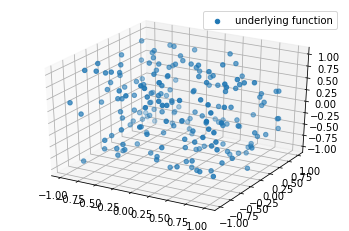

In [4]:
#Lets do some visualizations for the built tensor
def plot_4d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0],x[:, 1],x[:, 2],y_true, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0],x[:, 1],x[:, 2], y_pred, label='our function')
  plt.legend()
plot_4d(x, y_true)

In [8]:
try:
    import tensorflow as tf
except:
    print("You don't have tensorflow installed yet")
try:
    import numpy as np
except:
    print("You don't have numpy installed yet")
try:
    import matplotlib.pyplot as plt
except:
    print("You don't have matplotlib installed yet")
from IPython.display import display, clear_output, Markdown
clear_output()

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
a = 2
b = 3
c = 5

### Function: $$y=(2)x^3+(3)x^2+(5)x$$

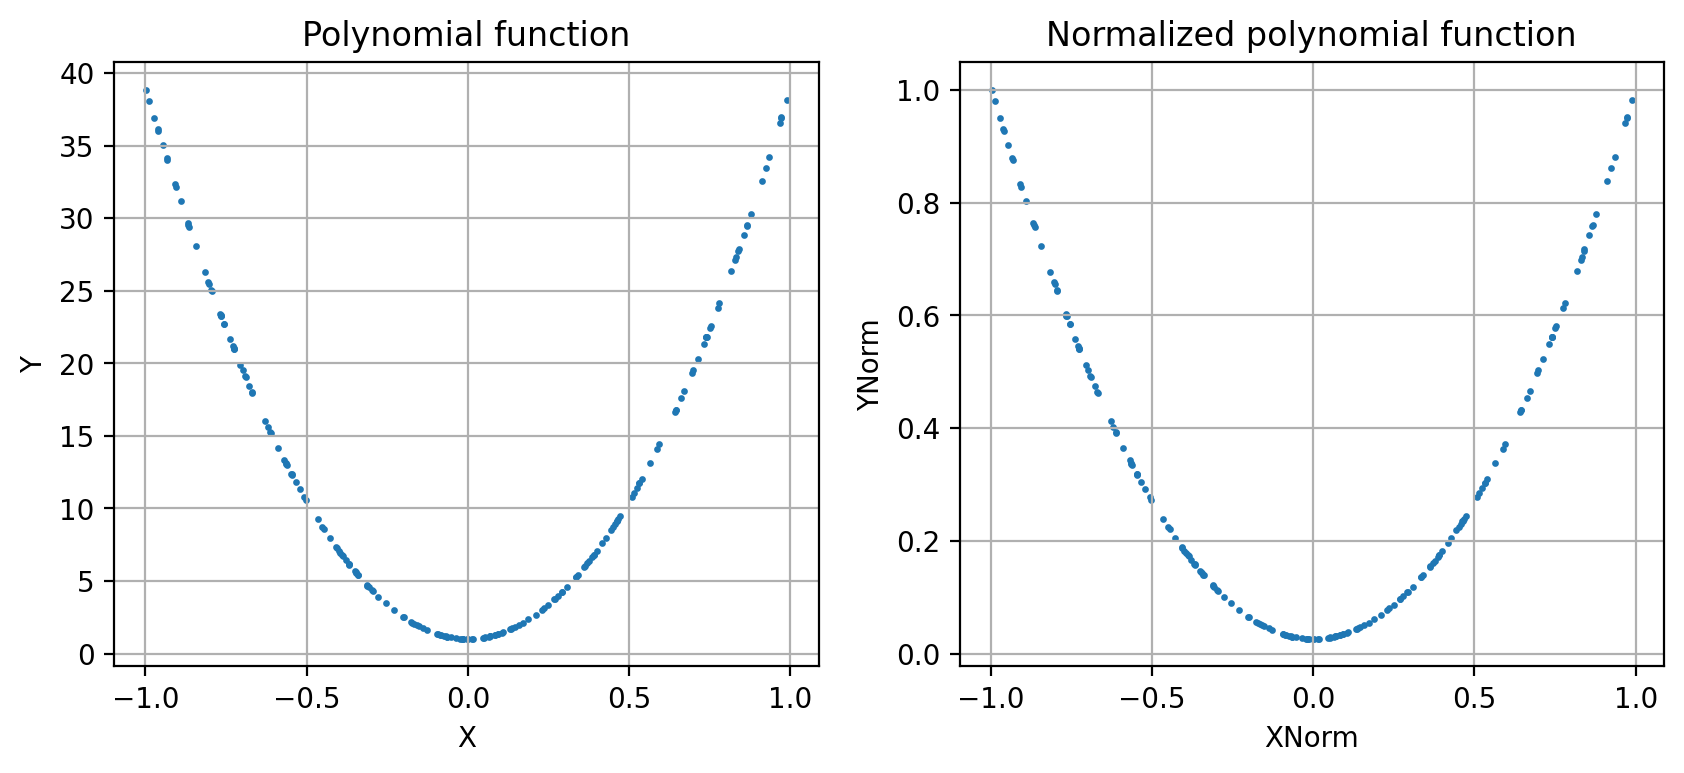

In [11]:
display(Markdown("### Function: $$y=("+str(a)+")x^3+("+str(b)+")x^2+("+str(c)+")x$$"))
x = (np.random.rand(1, 200) -0.5)*2
y_raw = (a*x)**2 + (b*x)**2 + (c*x)**2 + 1
y = y_raw/np.max(y_raw)
fig, ax = plt.subplots(ncols=2, figsize=[10,4], dpi=200)
ax[0].scatter(x, y_raw, s=2, label="Original Data")
ax[1].scatter(x, y, s=2, label="Normalized Data")
ax[0].set_xlabel("X")
ax[1].set_xlabel("XNorm")
ax[0].set_ylabel("Y")
ax[1].set_ylabel("YNorm")
ax[0].set_title("Polynomial function")
ax[1].set_title("Normalized polynomial function")
ax[0].grid()
ax[1].grid()
plt.show()

In [12]:
batch_size = 2
epochs = 20
hidden_units = 12

In [13]:
indices = np.arange(0,x.shape[1])
np.random.shuffle(indices)
x_train = x[:,indices[:int(float(len(indices))*0.7)]]
x_test = x[:,indices[int(float(len(indices))*0.7):]]
y_train = y[:,indices[:int(float(len(indices))*0.7)]]
y_test = y[:,indices[int(float(len(indices))*0.7):]]
train_num_batches = int(float(x_train.shape[1])/batch_size)
test_num_batches = int(float(x_test.shape[1])/batch_size)
print("X Train shape: ", x_train.shape)
print("Y Train shape: ", y_train.shape)
print("X Test shape: ", x_test.shape)
print("Y Test shape: ", y_test.shape)

X Train shape:  (1, 140)
Y Train shape:  (1, 140)
X Test shape:  (1, 60)
Y Test shape:  (1, 60)


In [14]:
# Graph:

## Input Tensors: one for X values and one fot Y values: 

xx = tf.placeholder(tf.float32, shape=[1, batch_size], name='x')
yy = tf.placeholder(tf.float32, shape=[1, batch_size], name='y')

## HIDDEN LAYER:
# Initializing Weights (W) and biases (b) for the hidden layer:

W1 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[hidden_units,1]), name='W1')
b1 = tf.Variable(tf.zeros((hidden_units,1)), tf.float32, name='b1')

# Compute the matrices multiplication and apply RELU (Rectified Linear Unit) activation:

z1 = tf.add(tf.matmul(W1, xx), b1)
a1 = tf.nn.relu(z1)

## OUTPUT LAYER:
# Initializing Weights (W2) and biases (b2):

W2 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[1,hidden_units]), name='W2')
b2 = tf.Variable(tf.zeros((1,1)), tf.float32, name='b2')

# Compute matrices multiplication and apply TANH (hyperbolic tan) activation to the output layer:
z2 = tf.add(tf.matmul(W2, a1), b2)
y_hat = tf.tanh(z2)

# Compute loss function (difference between predicted Y (Y_HAT) and real Y):
cost = tf.reduce_mean(tf.square(yy - y_hat))

# Setting up Gradient Descend Optimizer to backpropagate the error and update weights and biases to minimize loss:

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost, var_list=[W1,b1,W2,b2])

# This will initialize all variables and build the graph:
init = tf.global_variables_initializer()

Iteration number: 1400 of 1400

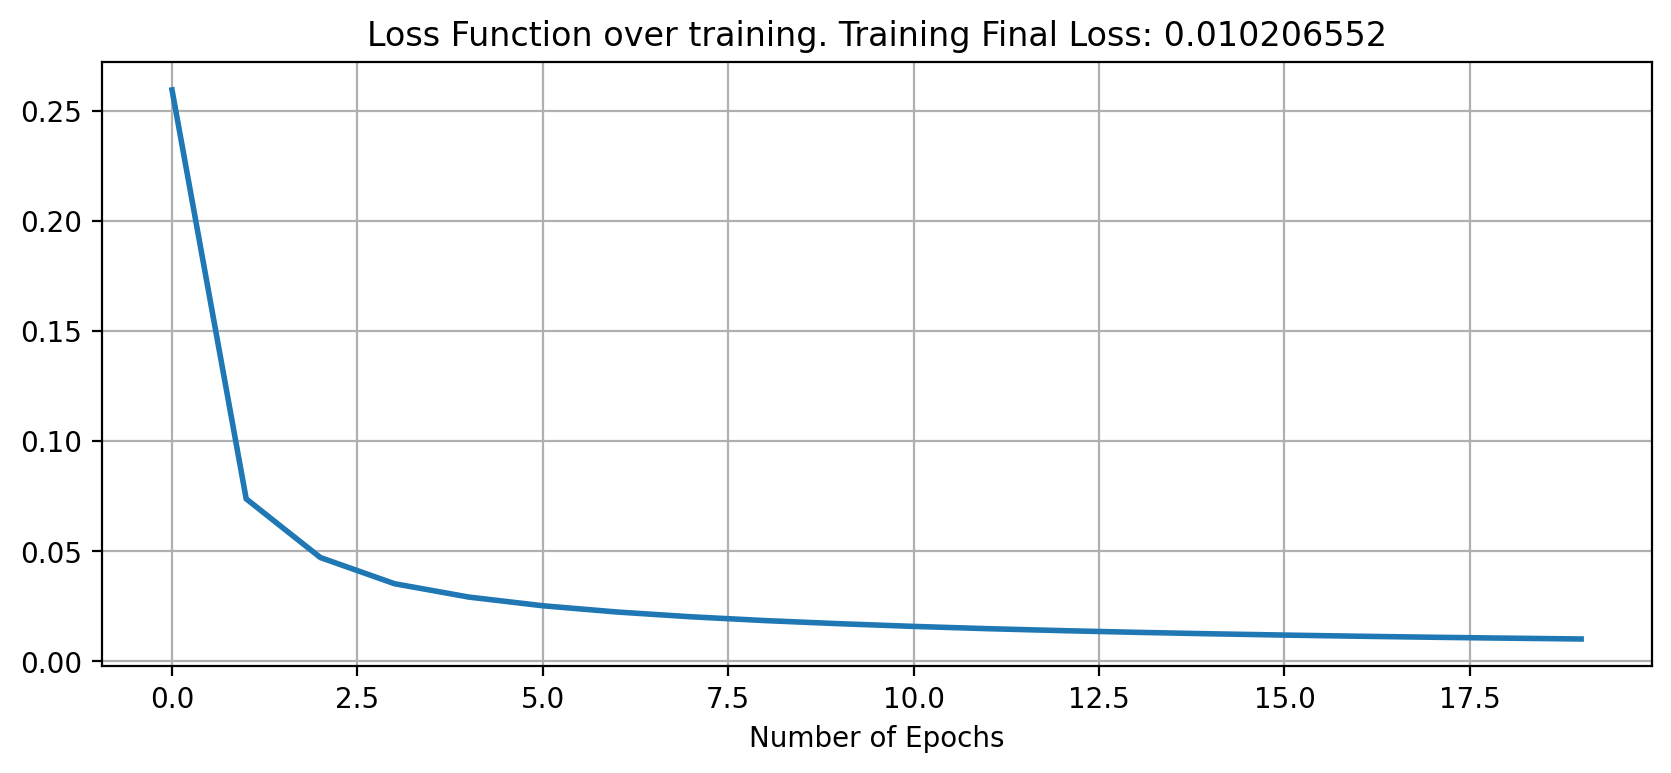

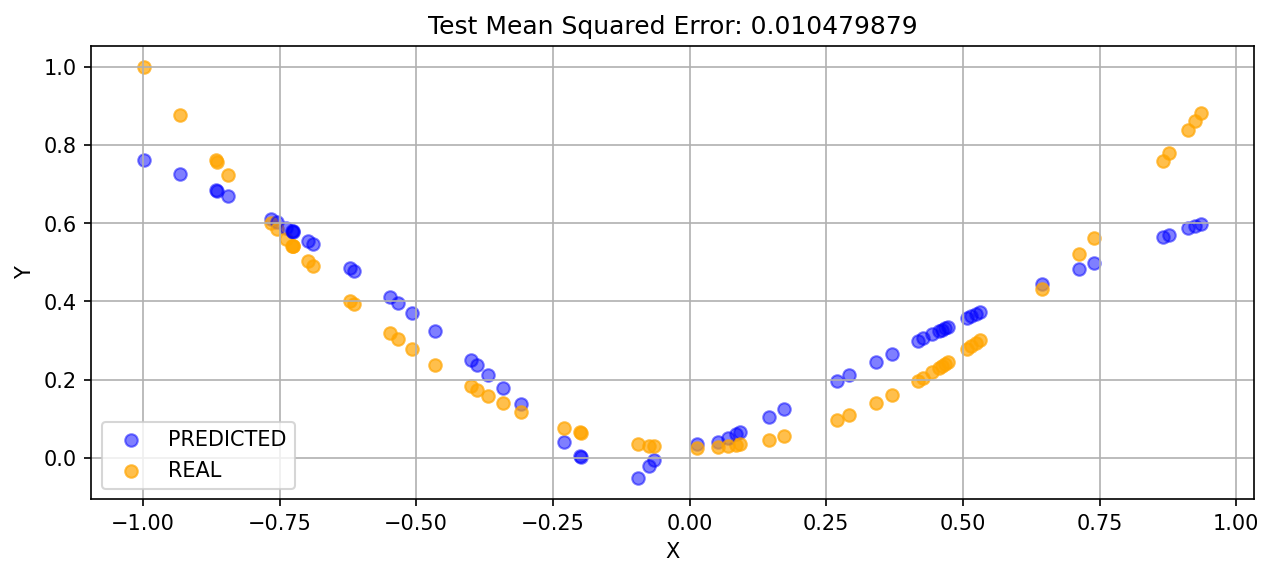

In [15]:
slider = 0
slider_max = train_num_batches*epochs
losses = []
with tf.Session() as sess:
    sess.run(init)
    for m in range(0,epochs):
        loss = []
        for k in range(0,train_num_batches):
            x_batch = x_train[:, k*batch_size:k*batch_size+batch_size]
            y_batch = y_train[:, k*batch_size:k*batch_size+batch_size]
            sess.run(train, feed_dict={xx: x_batch, yy: y_batch})
            loss_ = sess.run(cost, feed_dict={xx: x_batch, yy: y_batch})
            loss.append(loss_)
            slider += 1
            clear_output(wait=True)
            display(Markdown("Iteration number: "+str(slider)+" of "+str(slider_max)))
        losses.append(np.mean(loss))
            
    plt.figure(figsize=[10,4], dpi=200)
    plt.plot(losses, linewidth=2)
    plt.title("Loss Function over training. Training Final Loss: "+str(losses[-1]))
    plt.grid()
    plt.xlabel("Number of Epochs")
    plt.show()
    plt.figure(figsize=[10,4], dpi=150)
    losses_test = []
    for k in range(test_num_batches):
        x_batch = x_test[:, k*batch_size:k*batch_size+batch_size]
        y_batch = y_test[:, k*batch_size:k*batch_size+batch_size]
        plt.scatter(x_batch[0], sess.run(y_hat, feed_dict={xx: x_batch})[0], c='blue', alpha=.5)
        plt.scatter(x_batch[0], y_batch[0], c='orange', alpha=.7)
        losses_test.append(sess.run(cost, feed_dict={xx: x_batch, yy: y_batch}))
    loss_test = np.mean(losses_test)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Test Mean Squared Error: "+str(loss_test))
    plt.grid()
    plt.legend(["PREDICTED", "REAL"])
    plt.show()
  